#### Aula 05 - Modelo Logístico

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [67]:
lstx = (12,15,42,52,59,73,82,91,96,105,114,120,121,128,130,
        139,139,157,1,1,2,8,11,18,22,31,37,61,72,81,97,112,
        118,127,131,140,151,159,177,206)
lsty= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,
       0,0,0,0,0,0,0,0,0,0,0,0,0,0)
df = pd.DataFrame({'x':lstx,'y':lsty})
x = df['x']
y = df['y']
df.head()

,x,y
0,12,1
1,15,1
2,42,1
3,52,1
4,59,1


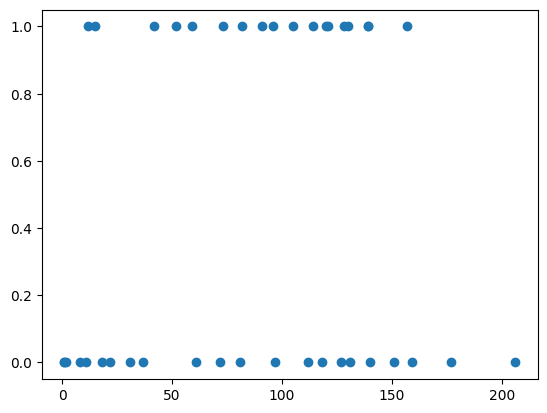

In [68]:
plt.scatter(x,y)
plt.show()

In [69]:
x_pred = sm.add_constant(x)
model = sm.Logit(y, x_pred).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681303
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                0.009934
Time:                        22:05:40   Log-Likelihood:                -27.252
converged:                       True   LL-Null:                       -27.526
Covariance Type:            nonrobust   LLR p-value:                    0.4596
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5727      0.602     -0.951      0.342      -1.753       0.608
x              0.0043      0.

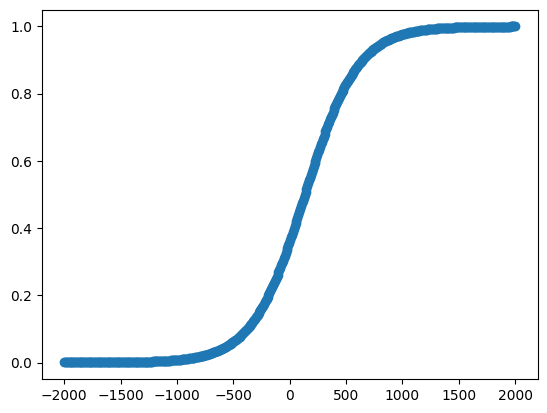

In [70]:
x_teste = np.linspace(-2000, 2000, 500)
y_prob = model.predict(sm.add_constant(x_teste))
plt.scatter(x_teste, y_prob)

In [71]:
# Realizar teste de hipótese
n = len(df)
k = 2
gl = n-k
beta_0 = model.params[0]
beta_1 = model.params[1]
print('y = ', beta_0,'+', beta_1,'* x')
print('H0: beta_1 = 0')
print('H1: beta_1 != 0')

y =  -0.5726931061206104 + 0.0042957872624721635 * x
H0: beta_1 = 0
H1: beta_1 != 0


In [72]:
t_crit = stats.t.ppf(0.975, df=gl)
print('t_critico = ', t_crit)
t_atual = beta_1/model.bse[1]
print('t_atual = ', t_atual)
print('Como t_atual < t_critico, então não rejeitamos H0')

t_critico =  2.024394164575136
t_atual =  0.7344029072729139
Como t_atual < t_critico, então não rejeitamos H0


In [73]:
p_val = (1 - stats.t.cdf(abs(t_atual), df=gl)) * 2
print('p_valor = ', p_val*100, '%')
print('Como p_valor > alpha (5%), então não rejeitamos H0')

p_valor =  46.721106916226596 %
Como p_valor > alpha (5%), então não rejeitamos H0


In [74]:
lstxr = (55.3,55.3,55.3,55.9,55.9,55.9,55.9,56.1,56.1,56.1,56.1,56.1,56.1,56.8,
        56.8,57.0,57.0,57.0,57.8,57.8,57.8,57.9,57.9,57.9,58.8,58.8,58.8,59.8,
        59.8,59.8,62.2,62.2,65.3,65.3,65.3,65.3,68.7,69.0,73.0,73.0,63.8,63.8,
        63.8,63.9,63.9,63.9,64.7,64.7,64.7,65.1,65.1,65.1,67.4,67.4,67.4,67.4,
        68.7,68.7,68.7,70.4,70.4,71.2,71.2,73.1,73.1,74.6,74.6,74.6,74.6,79.3,
        79.3,79.3,79.3,79.3,83.0,83.0,83.0)
lstyr= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0)
df_2 = pd.DataFrame({'x':lstxr,'y':lstyr})
x_2 = df_2['x']
y_2 = df_2['y']
df_2.head()

,x,y
0,55.3,1
1,55.3,1
2,55.3,1
3,55.9,1
4,55.9,1


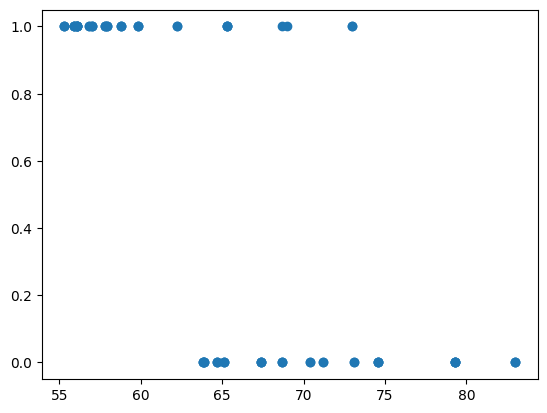

In [75]:
plt.scatter(x_2,y_2)

In [76]:
x_pred_2 = sm.add_constant(x_2)
model_2 = sm.Logit(y_2, x_pred_2).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.4902
Time:                        22:05:42   Log-Likelihood:                -27.181
converged:                       True   LL-Null:                       -53.314
Covariance Type:            nonrobust   LLR p-value:                 4.849e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0140      5.041      4.565      0.000      13.133      32.895
x             -0.3562      0.

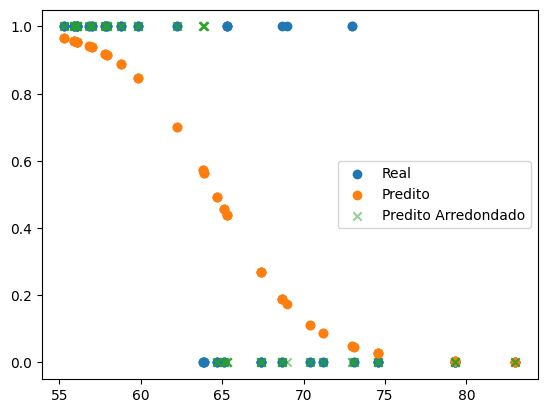

In [77]:
y_prob_2 = model_2.predict(sm.add_constant(x_2))
y_prob_around_2 = np.around(y_prob_2)
plt.scatter(x_2, y_2, label = 'Real')
plt.scatter(x_2, y_prob_2, label = 'Predito')
plt.scatter(x_2, y_prob_around_2, label = 'Predito Arredondado', marker = 'x', alpha=0.5)
plt.legend()
plt.show()

In [78]:
n_2 = len(df_2)
k_2 = 2
gl_2 = n_2-k_2
beta_0_2 = model_2.params[0]
beta_1_2 = model_2.params[1]
print('y = ', beta_0_2,'+', beta_1_2,'* x')

y =  23.01400401177244 + -0.3562026281870188 * x


In [79]:
t_crit_2 = stats.t.ppf(0.975, df=gl_2)
print('t_critico = ', t_crit_2)
t_atual_2 = beta_1_2/model_2.bse[1]
print('t_atual = ', t_atual_2)
print('Como t_atual > t_critico, então rejeitamos H0')

t_critico =  1.9921021536898653
t_atual =  -4.54319636419011
Como t_atual > t_critico, então rejeitamos H0


In [80]:
p_val_2 = (1 - stats.t.cdf(abs(t_atual_2), df=gl_2)) * 2
print('p_valor = ', p_val_2*100, '%')
print('Como p_valor < alpha (5%), então rejeitamos H0')

p_valor =  0.002080072759658158 %
Como p_valor < alpha (5%), então rejeitamos H0


In [81]:
print('Razão das chances = ', np.exp(beta_1_2))

Razão das chances =  0.7003306991172529


#### Aula 05 - Modelo Polinomial

In [90]:
lstx = (7,10.3,13.7,16.6,19.8,22)
lsty= (479,503,487,470,458,412)
df = pd.DataFrame({'x':lstx,'y':lsty})
x = df['x']
x_medio = np.mean(x)
print('x_medio = ', x_medio)
x_linha = x - x_medio
y = df['y']
df

x_medio =  14.9


,x,y
0,7.0,479
1,10.3,503
2,13.7,487
3,16.6,470
4,19.8,458
5,22.0,412


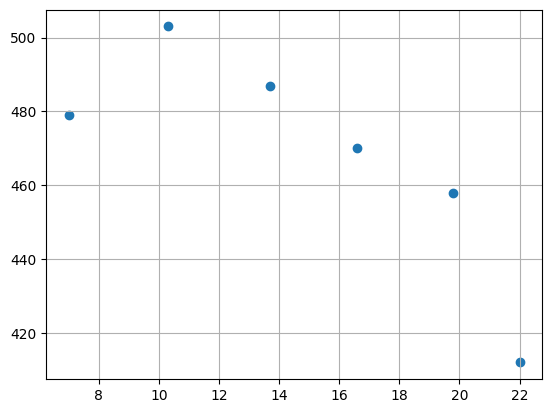

In [85]:
plt.scatter(x,y)
plt.grid()
plt.show()

In [86]:
# Regressão polinomial
x_pred = sm.add_constant(x)
model = sm.OLS(y, x_pred).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6.950
Date:                Wed, 06 Sep 2023   Prob (F-statistic):             0.0578
Time:                        22:14:54   Log-Likelihood:                -25.637
No. Observations:                   6   AIC:                             55.27
Df Residuals:                       4   BIC:                             54.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6984     26.328     20.271      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


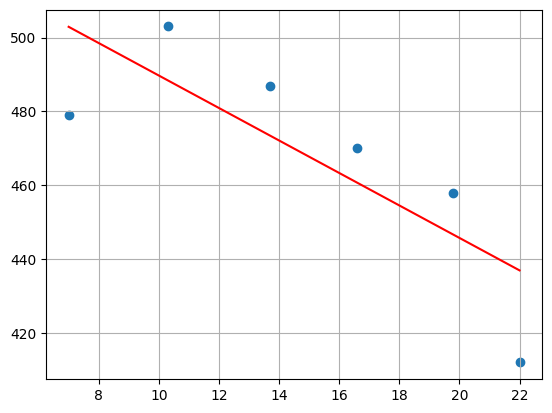

In [94]:
plt.scatter(x,y)
plt.plot(x, model.predict(x_pred), color='red')
plt.grid()
plt.show()

In [99]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_pred)
x_poly.shape

(6, 6)

In [100]:
x_poly

array([[  1.  ,   1.  ,   7.  ,   1.  ,   7.  ,  49.  ],
       [  1.  ,   1.  ,  10.3 ,   1.  ,  10.3 , 106.09],
       [  1.  ,   1.  ,  13.7 ,   1.  ,  13.7 , 187.69],
       [  1.  ,   1.  ,  16.6 ,   1.  ,  16.6 , 275.56],
       [  1.  ,   1.  ,  19.8 ,   1.  ,  19.8 , 392.04],
       [  1.  ,   1.  ,  22.  ,   1.  ,  22.  , 484.  ]])

In [101]:
x_poly[:,3:6]

array([[  1.  ,   7.  ,  49.  ],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  13.7 , 187.69],
       [  1.  ,  16.6 , 275.56],
       [  1.  ,  19.8 , 392.04],
       [  1.  ,  22.  , 484.  ]])

In [103]:
model_poly = sm.OLS(y, x_poly[:,3:6]).fit()
y_pred_poly = model_poly.predict(x_poly[:,3:6])
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     22.51
Date:                Wed, 06 Sep 2023   Prob (F-statistic):             0.0156
Time:                        22:36:37   Log-Likelihood:                -20.339
No. Observations:                   6   AIC:                             46.68
Df Residuals:                       3   BIC:                             46.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.2396     36.453     11.062      0.0

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


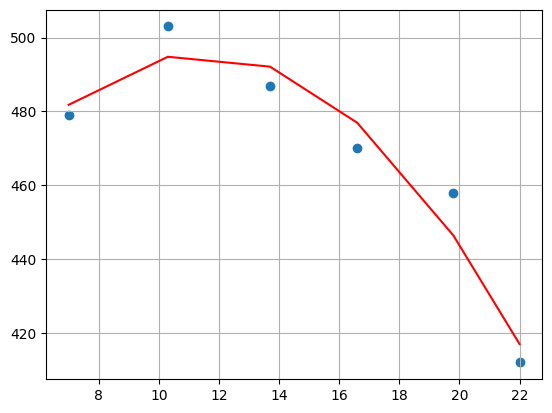

In [104]:
plt.scatter(x,y)
plt.plot(x, y_pred_poly, color='red')
plt.grid()
plt.show()

In [125]:
SQE = np.sum((y - y_pred_poly)**2)
print('SQE = ', SQE)

SQT = np.sum((y - np.mean(y))**2)
print('SQT = ', SQT)

SQR = SQT - SQE
print('SQR = ', SQR)

R2 = 1 - SQE/SQT
print('Coeficiente de determinação (R2) =', R2)

k = model_poly.df_model 
print('k = ', k)
n = model_poly.nobs
print('n = ', n)
R2adj = ((n-1)*R2 - k)/(n-k-1)
print('Coeficiente de determinação ajustado (R2adj) =', R2adj)

s2 = SQE/(n-k-1)
print('s2 = ', s2)
s = np.sqrt(s2)
print('s = ', s)

SQE =  309.10898960299943
SQT =  4946.833333333333
SQR =  4637.724343730333
Coeficiente de determinação (R2) = 0.9375137651151243
k =  2.0
n =  6.0
Coeficiente de determinação ajustado (R2adj) = 0.8958562751918739
s2 =  103.03632986766648
s =  10.150681251407045


In [121]:
gl = n-(k+1)
print('gl = ', gl)
t_crit = stats.t.ppf(0.995, df=gl)
print('t_critico = ', t_crit)

gl =  3.0
t_critico =  5.84090929975643


In [128]:
y_14 = model_poly.params[0] + model_poly.params[1]*14 + model_poly.params[2]*14**2
print('y_14 = ', y_14)
y_14_pred = model_poly.predict([1,14,196])
print('y_14_pred = ', y_14_pred)

y_14 =  491.0975487168419
y_14_pred =  [491.09754872]


In [131]:
s_y_14 = 6.49 # dado no enunciado
erro_y = t_crit * np.sqrt(s**2 + s_y_14**2)
print('erro_y = ', erro_y)
print('Intervalo de predição = [', y_14 - erro_y, ',', y_14 + erro_y, ']')

erro_y =  70.371790555333
Intervalo de predição = [ 420.7257581615089 , 561.4693392721749 ]


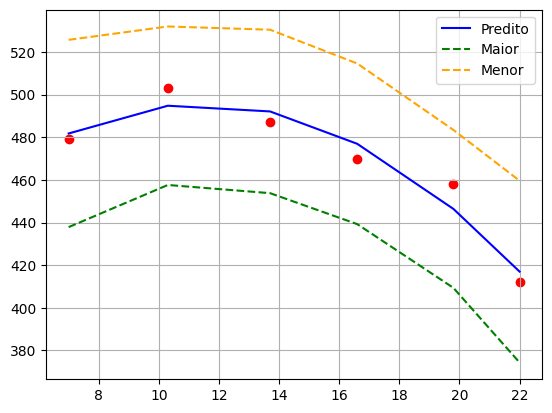

In [135]:
# Intervalo de predição
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper, lower = wls_prediction_std(model_poly, alpha=0.05)
plt.scatter(x,y, color = 'red')
plt.plot(x, y_pred_poly, color='blue', label = 'Predito')
plt.plot(x, upper, '--',color='green', label = 'Maior')
plt.plot(x, lower, '--',color='orange', label = 'Menor')
plt.legend()
plt.grid()
plt.show()

In [137]:
beta_2 = model_poly.params[2]
t_atual = beta_2/model_poly.bse[2]
print('t_atual = ', t_atual)

t_atual =  -3.8128434002531923


In [138]:
beta_1 = model_poly.params[1]
t_beta_1 = beta_1/model_poly.bse[1]
print('t_beta_1 = ', t_beta_1)

t_beta_1 =  2.9651014305680152


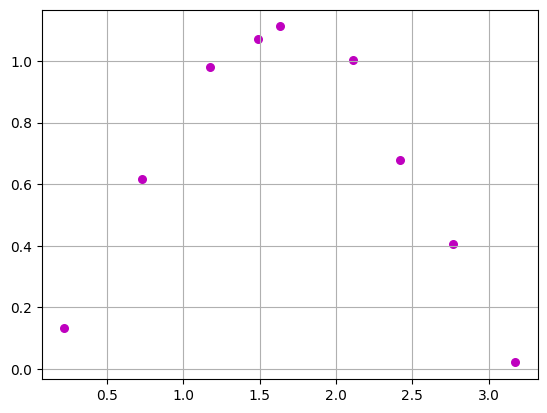

In [139]:
lstx = (0.219, 0.730, 1.174, 1.490, 1.634, 2.109, 2.419, 2.764, 3.174)
lsty = (0.132, 0.617, 0.979, 1.070, 1.112, 1.003, 0.679, 0.406, 0.021)
# Construir o DataFrame e nomear as colunas
df_ex2 = pd.DataFrame(list(zip(lstx, lsty)),
columns =["x","y"])
x=df_ex2['x']
y=df_ex2['y']
plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.grid(True) 

In [148]:
slope = 23.0140
intercept = -0.3562
x = 0.15
equacao = np.exp(intercept + slope*x)
pi_chapeu = equacao/(1+equacao)
print('pi_chapeu = ', pi_chapeu)


pi_chapeu =  0.9567233069145256
